In [1]:
%matplotlib inline

In [2]:
path_results = !ls *.logps.csv

In [3]:
print path_results

['anglican.results.logps.csv', 'edward_hmc.results.logps.csv', 'stan.results.logps.csv', 'static_mh.results.logps.csv', 'venture_mh.results.logps.csv']


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
from matplotlib.ticker import AutoLocator
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import LogFormatter

In [6]:
def summarize_mean_runtime_likelihood(method, df_stats):
    """Aggregate the runtimes."""
    # For some reason Edward has very bad runs, exclude them.
    factor = 1000
    if 'edward' in method:
        df_stats = df_stats[df_stats['runtime']<100]
        df_stats = df_stats[df_stats['predictive_likelihood']>-10**4]
        factor = 1
    # Compute and return statistics
    unique_iters = sorted(pd.unique(df_stats['num_steps']))
    runtimes = np.asarray([
        df_stats[df_stats['num_steps']==i]['runtime'].mean()
        for i in sorted(unique_iters)
    ])
    likelihoods = np.asarray([
        df_stats[df_stats['num_steps']==i]['predictive_likelihood'].mean()
        for i in sorted(unique_iters)
    ])
    return (factor * runtimes, likelihoods)

In [7]:
def load_runtime_likelihood(path_results, cutoff=-1295):
    method = path_results.split('.')[0]
    df_stats = pd.read_csv(path_results)
    runtimes, likelihoods = summarize_mean_runtime_likelihood(method, df_stats)
    threshold = runtimes[np.argmax(likelihoods>cutoff)]
    return method, runtimes, likelihoods, threshold

In [8]:
import matplotlib

('anglican', 3922.9749707475003)
('edward_hmc', 76.5083212601511)
('stan', 53.37555408477783)
('static_mh', 75.29754638671875)
('venture_mh', 1297231.6961288)


[]

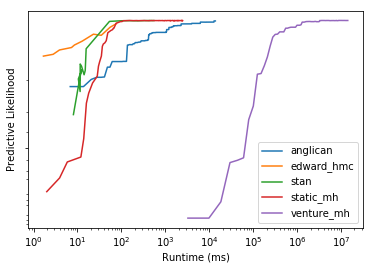

In [9]:
fig, ax = plt.subplots()
for p in path_results:
    method, runtimes, likelihoods, threshold = load_runtime_likelihood(p)
    ax.plot(runtimes, likelihoods, label=method)
    print (method, threshold)
    ax.set_xlabel('Runtime (ms)')
ax.set_ylabel('Predictive Likelihood')
ax.set_xscale('log')
ax.set_yscale('symlog')
ax.legend(loc='lower right')
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_yticklabels([])